##  Makine Öğrenmesi Vize Ödevi

### Kullanılan Kütüphaneler

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import MinMaxScaler

### Verinin tanımlanması

In [3]:
column_names = [
    "Number of times pregnant",
    "Plasma glucose concentration",
    "Diastolic blood pressure",
    "Triceps skinfold thickness",
    "2-Hour serum insulin",
    "Body mass index",
    "Diabetes pedigree function",
    "Age",
    "Class variable"
]


data = pd.read_csv("/Users/buketcalp/Downloads/veri-seti.txt", sep='\s+', header=None, names=column_names)

In [4]:
display(data.info(),data.head())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skinfold thickness    768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class variable                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skinfold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class variable,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Veri kümesi 768 kişiye ait tıbbi verileri içermekte ve diyabet riskini değerlendirmek için kullanılması için sağlıkla ilgili 9 ölçütü detaylandırmaktadır.

Ölçümler arasında gebelik sayısı, plazma glukoz konsantrasyonu, diyastolik kan basıncı, triseps deri kıvrım kalınlığı, 2 saatlik serum insülini, vücut kitle indeksi, diyabet soyağacı fonksiyonu, yaş ve diyabetin varlığını gösteren bir sınıf değişkeni bulunmaktadır. Veriler, eksik verileri temsil edebilecek bazı sıfır değerleriyle birlikte, farklı ölçümler arasında geniş bir değer aralığına işaret etmektedir.

Veri setindeki bireylerin ortalama yaşı 33 civarındadır ve ortalama hamile kalma sayısı 3,85'tir. Plazma glikozu ve BMI gibi ölçümler, diyabet analizi için uygun olan yüksek uçtadır. Bu veri kümesi tipik olarak diyabet risk faktörlerini anlamak için istatistiksel analiz ve tahmine dayalı modelleme için kullanılır.

### Verinin Ön işlemesi

Veride dosyasında ifade edildiği üzere "sıfır" olan değerler eksik veri olarak gözlemlendiği için "sıfır" olan değerleride incelemek gerekmektedir.

In [5]:
columns_to_check = [
    "Plasma glucose concentration",
    "Diastolic blood pressure",
    "Triceps skinfold thickness",
    "2-Hour serum insulin",
    "Body mass index"
]

for column in columns_to_check:
    zero_count = (data[column] == 0).sum()
    print(f"{column} kolonunun {zero_count} adet sıfır değeri var")

Plasma glucose concentration kolonunun 5 adet sıfır değeri var
Diastolic blood pressure kolonunun 35 adet sıfır değeri var
Triceps skinfold thickness kolonunun 227 adet sıfır değeri var
2-Hour serum insulin kolonunun 374 adet sıfır değeri var
Body mass index kolonunun 11 adet sıfır değeri var


Sıfır olan değerleri Missing Value (NAN) ile değiştirelim.

In [6]:
data_copy = data.copy(deep = True)
data_copy[columns_to_check] = data_copy[columns_to_check].replace(0,np.NaN)
print(data_copy.isnull().sum())

Number of times pregnant          0
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skinfold thickness      227
2-Hour serum insulin            374
Body mass index                  11
Diabetes pedigree function        0
Age                               0
Class variable                    0
dtype: int64


Nan değerlerini doldurabilmek için verinin dağılımını anlamalıyız.

array([[<Axes: title={'center': 'Number of times pregnant'}>,
        <Axes: title={'center': 'Plasma glucose concentration'}>,
        <Axes: title={'center': 'Diastolic blood pressure'}>],
       [<Axes: title={'center': 'Triceps skinfold thickness'}>,
        <Axes: title={'center': '2-Hour serum insulin'}>,
        <Axes: title={'center': 'Body mass index'}>],
       [<Axes: title={'center': 'Diabetes pedigree function'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Class variable'}>]], dtype=object)

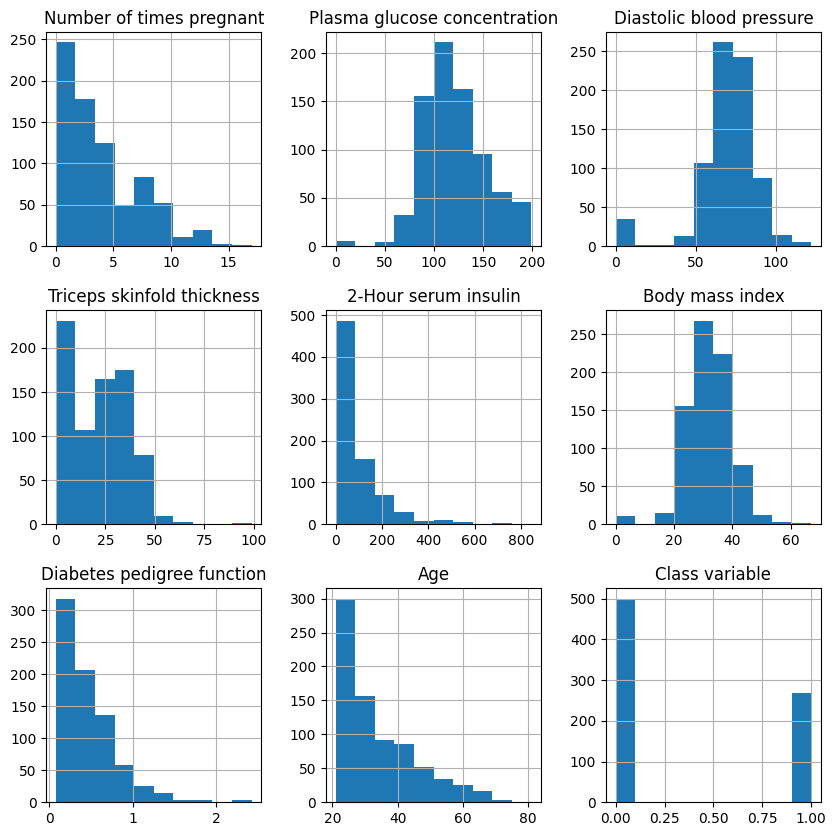

In [12]:
data.hist(figsize = (10,10))

Normal dağılıma yakın olan grafiklerde "Plasma glucose concentration" ve "Diastolic blood pressure" gibi ortalama ile veriyi düzenlemek, çarpık veya aykırı değerlere sahip veriler içinde medyan kullanıcağım.

In [7]:
data_copy['Plasma glucose concentration'] = data_copy['Plasma glucose concentration'].fillna(data_copy['Plasma glucose concentration'].mean())
data_copy['Diastolic blood pressure'] = data_copy['Diastolic blood pressure'].fillna(data_copy['Diastolic blood pressure'].mean())
data_copy['Triceps skinfold thickness'] = data_copy['Triceps skinfold thickness'].fillna(data_copy['Triceps skinfold thickness'].median())
data_copy['2-Hour serum insulin'] = data_copy['2-Hour serum insulin'].fillna(data_copy['2-Hour serum insulin'].median())
data_copy['Body mass index'] = data_copy['Body mass index'].fillna(data_copy['Body mass index'].median())

data_copy.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

Kayıp gözlem problemini düzelttik.

####    Aykırı gözlemlerin incelenmesi

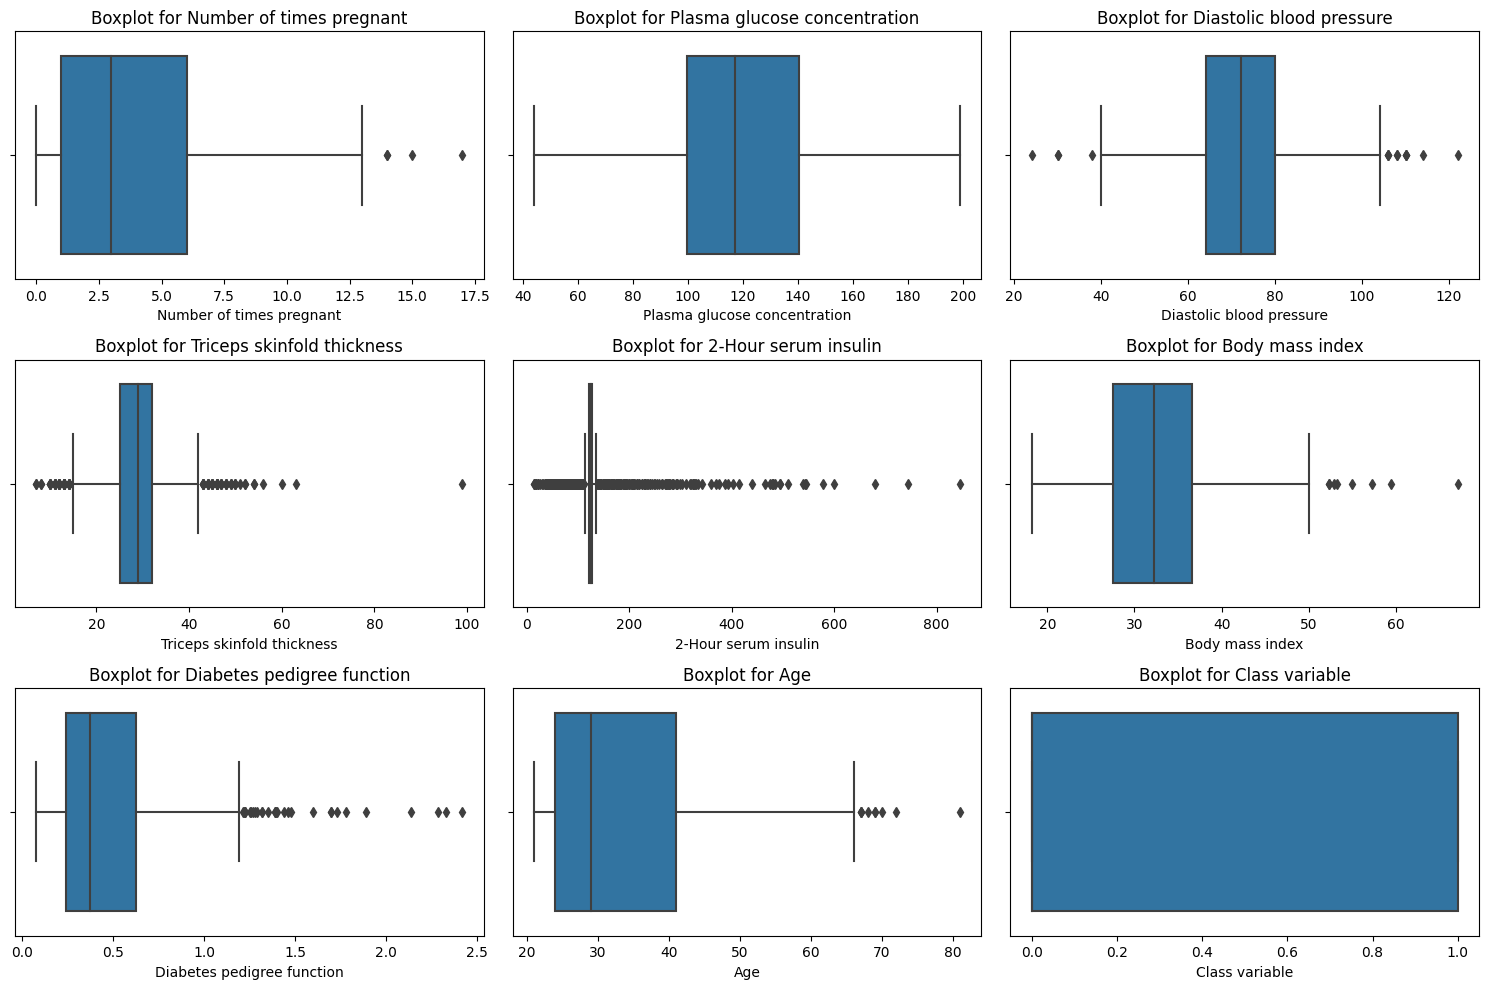

In [14]:
num_rows, num_cols = 3, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()


for i, column in enumerate(data_copy.columns):
    sns.boxplot(data=data_copy, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')


for j in range(len(data_copy.columns), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

<Axes: >

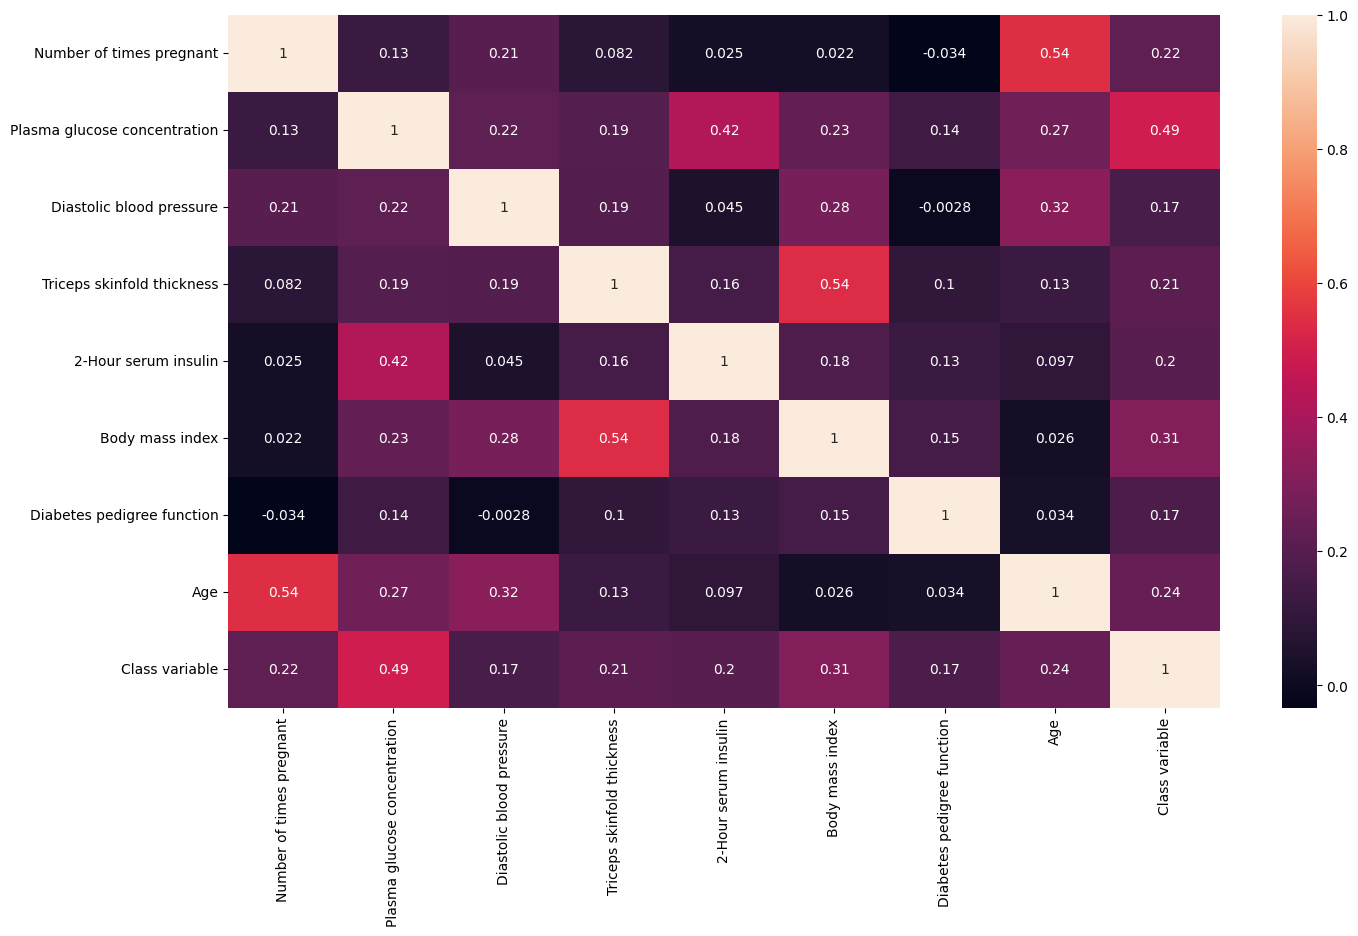

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(data_copy.corr(), annot=True)

Yüksek korelasyonel ilişki gözlemlenmemiştir. Orta düzeyde gözlemleneneler ise : 
"Plasma glucose concentration" ve "Class variable" arasında 0.49'luk pozitif bir korelasyon var, bu da plazma glikoz düzeyinin diyabet sınıflandırmasıyla güçlü bir ilişki gösterdiğini düşündürüyor.

"Age" ve "Number of times pregnant" arasında 0.54'lük pozitif bir korelasyon var, bu da yaş ilerledikçe daha fazla hamilelik sayısının görüldüğünü gösteriyor.

"2-Hour serum insulin" ve "Triceps skinfold thickness" arasında 0.54'lük pozitif bir korelasyon var, bu iki ölçümün birbiriyle güçlü bir ilişkisi olduğunu belirtiyor.

####    Outlier değerlerden kurtulma

In [8]:
numeric_columns = ['2-Hour serum insulin', 'Diabetes pedigree function']

for column_name in numeric_columns:
    Q1 = np.percentile(data_copy[column_name], 25, method='midpoint')
    Q3 = np.percentile(data_copy[column_name], 75, method='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outliers = data_copy[(data_copy[column_name] < low_lim) | (data_copy[column_name] > up_lim)][column_name]
    
    data_copy[column_name] = np.where(data_copy[column_name] < low_lim, low_lim, data_copy[column_name])
    data_copy[column_name] = np.where(data_copy[column_name] > up_lim, up_lim, data_copy[column_name])

Birinci ve üçüncü çeyrekleri (Q1 ve Q3) hesaplayıp, ardından IQR'yi hesaplar ve alt ve üst sınırları belirledik. Alt sınırın altındaki veya üst sınırın üstündeki değerler aykırı değerler olarak kabul edildi ve bu ilgili sınırlarda sınırlandırılarak aykırı değer problemi giderildi.

### 1.  MinMaxScaler normlaizasyon yöntemini kullanma

In [9]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_copy), columns=data_copy.columns)

####    Veriyi Eğitim ve Test olarak ayırma

In [10]:
X = normalized_data.drop("Class variable", axis=1)
y = normalized_data["Class variable"]

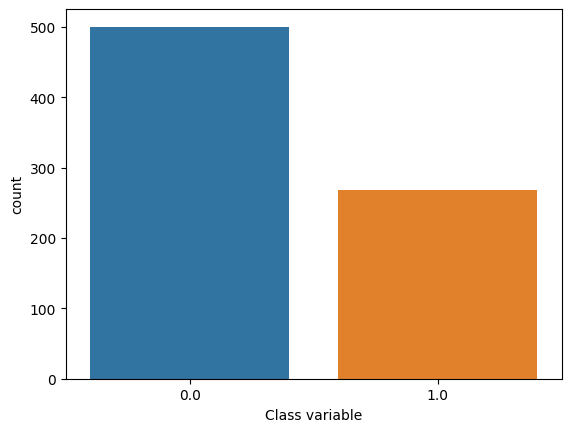

In [19]:
sns.countplot(x=y, data=data_copy)
plt.show()

Y değişkenimiz 0 ile 1'lerden oluşuyor yani binnary. Değerlerden oluştuğunu görebiliriz.

### 2.  PCA ve LDA Analizi

####    PCA

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Varyans oranı:" , pca.explained_variance_ratio_)
print("Ortalama" , sum(pca.explained_variance_))
print("PCA Components:\n", pca.components_)

Varyans oranı: [0.29099585 0.18128441]
Ortalama 3.7831681131054626
PCA Components:
 [[ 0.31472708  0.41356875  0.37999323  0.38133722  0.3438391   0.38197445
   0.13639168  0.39668921]
 [-0.54375027  0.04950561 -0.10408776  0.38651879  0.0973357   0.47676779
   0.21387372 -0.5090482 ]]


İlk iki temel bileşenin toplam varyansın yaklaşık %47,22'sini açıkladığını, ilk bileşenin yaklaşık %28,53'ünü ve ikincisinin yaklaşık %18,69'unu oluşturduğunu göstermektedir. PCA bileşenleri, orijinal sekiz özelliğin farklı düzeylerde katkısını gösterirken, ilk temel bileşen tüm özelliklerle genel olarak pozitif bir korelasyona sahipken, ikincisi pozitif ve negatif korelasyonların bir karışımını göstererek verilerin zıt yönlerini yakaladığını düşündürmektedir.

Bu bileşenler boyutluluğu azaltmaya ve altta yatan örüntüleri vurgulamaya yardımcı olsa da, varyansın yarısından fazlası hesaba katılmamıştır, bu da veri kümesinin karmaşıklığını tam olarak yakalamak için ek bileşenlerin gerekli olabileceğini düşündürmektedir.

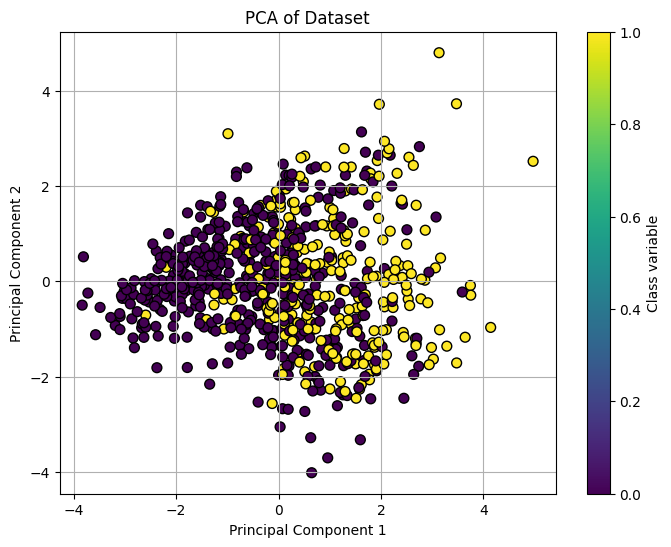

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class variable')
plt.grid(True)
plt.show()

Dağılım grafiği, PCA yoluyla iki temel bileşene indirgenmiş bir veri kümesini görselleştirerek gözlemler arasındaki varyansı ve potansiyel örüntüleri göstermektedir. 

Temel Bileşen 1 ve Temel Bileşen 2 eksenleri oluşturmakta ve veri noktalarının yayılımı gözlemlerin bu bileşenlerle nasıl ilişkili olduğunu göstermektedir. Mordan sarıya değişen bir renk gradyanı, ek bir değişkeni kodlamakta ve temel bileşenler arasındaki dağılımı hakkında bilgi vermektedir.

####    LDA

In [12]:
lda = LDA(n_components=1) 
X_lda = lda.fit_transform(X_scaled, y)
print("LDA Components:\n", lda.scalings_)

LDA Components:
 [[ 0.3105383 ]
 [ 0.83449166]
 [-0.0583265 ]
 [ 0.00347809]
 [ 0.08576873]
 [ 0.43009113]
 [ 0.22843677]
 [ 0.09877379]]


LDA bileşeni içindeki en ayırt edici iki öznitelik, mutlak ağırlıklarına göre sırasıyla ikinci ve altıncı özniteliklerdir. İkinci özniteliğin ağırlığı yaklaşık 0.835 ve altıncı özniteliğin ağırlığı yaklaşık 0.430'dur. Bu iki öznitelik, tek LDA bileşeni üzerinden verilerinizdeki sınıfları ayırt etmede en etkili olanlardı

Veriyi train ve test olucak şekilde ayıralım.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2002)

Veri setini rastgele olarak %70 eğitim %30 test olacak şekilde ayırdık. Tekrar çalıştırıldığında minik farklılıklar olmasın diye "random_state" komutu sayesinde sabit bir rastgele değişken atandı.

### 3. Çoklu Doğrusal Regresyon analizi 

In [18]:
lm_model = LinearRegression().fit(X_train, y_train)

#####   Tahmin

In [19]:
y_pred_LM_train = lm_model.predict(X_train)
y_pred_LM_test = lm_model.predict(X_test)

In [20]:
RMSE_LM_train = np.sqrt(mean_squared_error(y_train, y_pred_LM_train))
RMSE_LM_test = np.sqrt(mean_squared_error(y_test, y_pred_LM_test))

MAE_LM_train = mean_absolute_error(y_train, y_pred_LM_train)
MAE_LM_test = mean_absolute_error(y_test, y_pred_LM_test)

R2_LM_train = r2_score(y_train, y_pred_LM_train)
R2_LM_test = r2_score(y_test, y_pred_LM_test)


print("RMSE (Train):", RMSE_LM_train)
print("RMSE (Test):", RMSE_LM_test)
print("MAE (Train):", MAE_LM_train)
print("MAE (Test):", MAE_LM_test)
print("R2 Score (Train):", R2_LM_train)
print("R2 Score (Test):", R2_LM_test)

RMSE (Train): 0.4186160639379779
RMSE (Test): 0.3986759656232859
MAE (Train): 0.36165930942065266
MAE (Test): 0.34221093732140345
R2 Score (Train): 0.22652809021536713
R2 Score (Test): 0.307716999758461


Doğrusal Regresyon modeli, test setinde eğitim setine göre daha düşük hatalarla makul tahmin doğruluğu göstermiştir. 

R2 değerleri, test setinde daha yüksek olmak üzere orta düzeyde açıklayıcı güce işaret etmektedir. Bu, modelin iyi genelleme yaptığını ancak yetersiz uyum gösteriyor olabileceğini ve eğitim verilerinin varyansını daha iyi yakalamak için daha fazla iyileştirme potansiyeli olduğunu göstermektedir.

### Multinominal Lojistik Regresyon Analizi

In [21]:
mlr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(X_train, y_train)

#####   Tahmin

In [22]:
y_pred_MLR_train = mlr_model.predict(X_train)
y_pred_MLR_test = mlr_model.predict(X_test)

In [23]:
RMSE_MLR_train = np.sqrt(mean_squared_error(y_train, y_pred_MLR_train))
RMSE_MLR_test = np.sqrt(mean_squared_error(y_test, y_pred_MLR_test))

MAE_MLR_train = mean_absolute_error(y_train, y_pred_MLR_train)
MAE_MLR_test = mean_absolute_error(y_test, y_pred_MLR_test)

R2_MLR_train = r2_score(y_train, y_pred_MLR_train)
R2_MLR_test = r2_score(y_test, y_pred_MLR_test)

ACS_RF_train = accuracy_score(y_train, y_pred_MLR_train)
ACS_RF_test = accuracy_score(y_test,y_pred_MLR_test) 

print("RMSE (Train):", RMSE_MLR_train)
print("RMSE (Test):", RMSE_MLR_test)
print("MAE (Train):", MAE_MLR_train)
print("MAE (Test):", MAE_MLR_test)
print("R2 Score (Train):", R2_MLR_train)
print("R2 Score (Test):", R2_MLR_test)
print("Accuracy score (Train):", ACS_RF_train)
print("Accuracy score (Test):", ACS_RF_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_pred_MLR_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_pred_MLR_test))

print(classification_report(y_test, y_pred_MLR_test))


RMSE (Train): 0.5152400534737018
RMSE (Test): 0.4901629731627434
MAE (Train): 0.26547231270358307
MAE (Test): 0.24025974025974026
R2 Score (Train): -0.17174200648613192
R2 Score (Test): -0.04646464646464654
Accuracy score (Train): 0.7345276872964169
Accuracy score (Test): 0.7597402597402597
Confusion Matrix (Training Set):
 [[347  54]
 [109 104]]

Confusion Matrix (Testing Set):
 [[89 10]
 [27 28]]
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83        99
         1.0       0.74      0.51      0.60        55

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.76      0.76      0.75       154



Tahmine dayalı model, eğitim seti için 0,4957'lik bir RMSE ve test seti için 0,4462'lik iyileştirilmiş bir RMSE sergilemektedir.  MAE, eğitim setine (0,2458) kıyasla test seti (0,1931) için daha düşük bir değerle benzer bir model izlemektedir.

Modelin eğitim verileri üzerindeki performansı -0,0913'lük negatif bir R2 skoru gösterir, ancak 0,1395'lik bir R2 skoru ile test verilerinde önemli ölçüde iyileşir.

Doğruluk puanları eğitim seti için %75,42 ve test seti için %80,07 ile oldukça yüksektir. Sınıflandırma performansı açısından, karışıklık matrisi, 0 ve 1 sınıfları için sırasıyla 0,81 ve 0,77 hassasiyet puanları, 0,89 ve 0,64 geri çağırma puanları ve 0,85 ve 0,70 F1 puanları ile bir sınıf için diğerine göre daha iyi bir tahmin ortaya koymaktadır. 

Modelin test seti için genel doğruluğu %80'dir ve ağırlıklı ortalama F1 puanı 0,80'dir, bu da özellikle sınıf 0 örneklerini tanımlamada sağlam bir performansa işaret etmektedir.

#####   Roc eğrisi

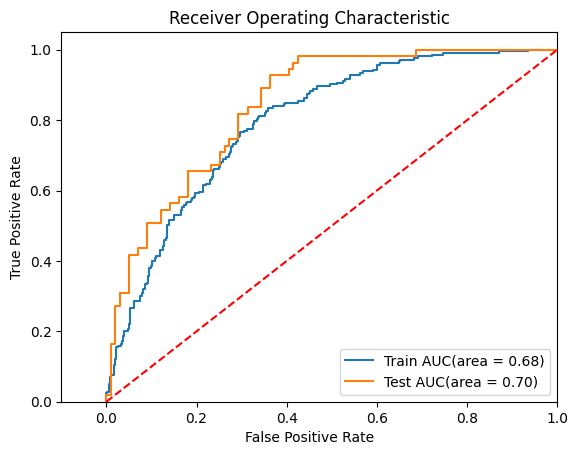

In [24]:
train_logit_roc_auc = roc_auc_score(y_train, y_pred_MLR_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, mlr_model.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, y_pred_MLR_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, mlr_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

Test setinde eğitim setinden daha iyi performans göstererek oldukça iyi bir sınıflandırıcı gibi görünmektedir. Yani modelin görünmeyen verilerde (test seti) iyi performans göstermesi, eğitildiği verilerin ötesinde iyi genelleme yaptığını göstermektedir.

####    Hiperparametre Ayarlaması

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

mlr_model = LogisticRegression(multi_class='multinomial', max_iter=2000)

In [26]:
mlr_model_CV = GridSearchCV(mlr_model, param_grid, cv=10, scoring='accuracy',n_jobs = -1).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.

In [27]:
mlr_model_CV.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

Cross validation yapıldıktan sonra en iyi parametreler belirlendi. Bu parametrelere göre modelimizi oluşturuyoruz

In [28]:
mlr_model_CV = LogisticRegression(C=1 ,multi_class='multinomial', solver='saga',penalty="l1", max_iter=1000).fit(X_train, y_train)

In [29]:
mlr_model_CV_train = mlr_model_CV.predict(X_train)
mlr_model_CV_test = mlr_model_CV.predict(X_test)

In [30]:
RMSE_RF_train = np.sqrt(mean_squared_error(y_train, mlr_model_CV_train))
RMSE_RF_test = np.sqrt(mean_squared_error(y_test, mlr_model_CV_test))


MAE_RF_train = mean_absolute_error(y_train, mlr_model_CV_train)
MAE_RF_test = mean_absolute_error(y_test, mlr_model_CV_test)


R2_RF_train = r2_score(y_train, mlr_model_CV_train)
R2_RF_test = r2_score(y_test, mlr_model_CV_test)

ACS_RF_train = accuracy_score(y_train, mlr_model_CV_train)
ACS_RF_test = accuracy_score(y_test,mlr_model_CV_test) 


print("RMSE (Train):", RMSE_RF_train)
print("RMSE (Test):", RMSE_RF_test)
print("MAE (Train):", MAE_RF_train)
print("MAE (Test):", MAE_RF_test)
print("R2 Score (Train):", R2_RF_train)
print("R2 Score (Test):", R2_RF_test)
print("Accuracy score (Train):", ACS_RF_train)
print("Accuracy score (Train):", ACS_RF_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, mlr_model_CV_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, mlr_model_CV_test))

print(classification_report(y_test, mlr_model_CV_test))

RMSE (Train): 0.5152400534737018
RMSE (Test): 0.496742636335202
MAE (Train): 0.26547231270358307
MAE (Test): 0.24675324675324675
R2 Score (Train): -0.17174200648613192
R2 Score (Test): -0.07474747474747478
Accuracy score (Train): 0.7345276872964169
Accuracy score (Train): 0.7532467532467533
Confusion Matrix (Training Set):
 [[347  54]
 [109 104]]

Confusion Matrix (Testing Set):
 [[88 11]
 [27 28]]
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82        99
         1.0       0.72      0.51      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Hiper parametre ayarlaması yapıldıktan sonra çok minik bir değişim gözlemlenmiştir. Accuracy değerimiz %1 artmıştır

#### Roc Curve

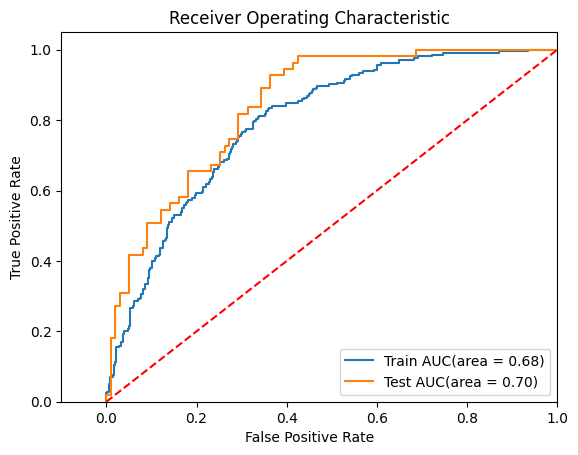

In [31]:
train_logit_roc_auc = roc_auc_score(y_train, mlr_model_CV_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, mlr_model_CV.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, mlr_model_CV_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, mlr_model_CV.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

Grafikte görüldüğü üzere ciddi bir değişim olmamıştır. Hemen hemen benzer bir grafik vermiştir.

### 4. Karar Ağaçları

In [32]:
rmf_model = RandomForestClassifier(random_state=2005).fit(X_train, y_train)

#####   Tahmin

In [33]:
y_pred_RF_train = rmf_model.predict(X_train)
y_pred_RF_test = rmf_model.predict(X_test)

In [34]:
RMSE_RF_train = np.sqrt(mean_squared_error(y_train, y_pred_RF_train))
RMSE_RF_test = np.sqrt(mean_squared_error(y_test, y_pred_RF_test))


MAE_RF_train = mean_absolute_error(y_train, y_pred_RF_train)
MAE_RF_test = mean_absolute_error(y_test, y_pred_RF_test)


R2_RF_train = r2_score(y_train, y_pred_RF_train)
R2_RF_test = r2_score(y_test, y_pred_RF_test)

ACS_RF_train = accuracy_score(y_train, y_pred_RF_train)
ACS_RF_test = accuracy_score(y_test,y_pred_RF_test) 


print("RMSE (Train):", RMSE_RF_train)
print("RMSE (Test):", RMSE_RF_test)
print("MAE (Train):", MAE_RF_train)
print("MAE (Test):", MAE_RF_test)
print("R2 Score (Train):", R2_RF_train)
print("R2 Score (Test):", R2_RF_test)
print("Accuracy score (Train):", ACS_RF_train)
print("Accuracy score (Test):", ACS_RF_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_pred_RF_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_pred_RF_test))

print(classification_report(y_test, y_pred_RF_test))

RMSE (Train): 0.0
RMSE (Test): 0.5284134548067254
MAE (Train): 0.0
MAE (Test): 0.2792207792207792
R2 Score (Train): 1.0
R2 Score (Test): -0.21616161616161622
Accuracy score (Train): 1.0
Accuracy score (Train): 0.7207792207792207
Confusion Matrix (Training Set):
 [[401   0]
 [  0 213]]

Confusion Matrix (Testing Set):
 [[81 18]
 [25 30]]
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79        99
         1.0       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154



Model, eğitim verileri üzerinde mükemmel bir performans göstermiş (doğruluk %100, RMSE ve MAE 0), ancak test verilerinde bu performans düşmüş, doğruluk %72'ye gerilemiş ve R² negatif bir değere (-0.216) düşmüş. Bu, modelin aşırı uyuma (overfitting) maruz kaldığını ve genelleme yapamadığını gösteriyor.

 Test seti üzerindeki hatalı sınıflandırmalar da, modelin gerçek dünya verileri üzerinde daha zayıf performans gösterebileceğine işaret ediyor. Precision ve recall değerleri, özellikle pozitif sınıfı tespit etmede (sınıf 1) zayıflıklar olduğunu gösteriyor.

#####   Roc eğrisi

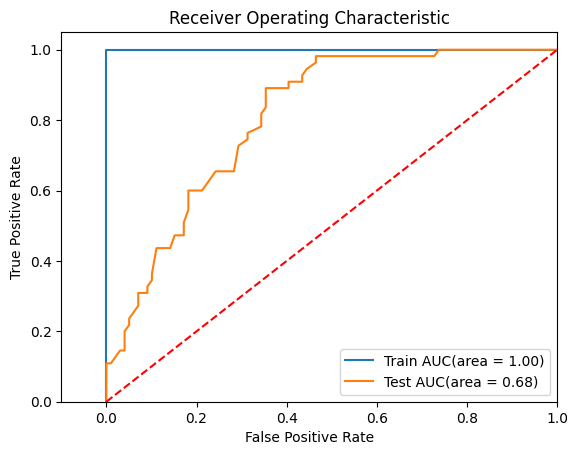

In [35]:
train_logit_roc_auc = roc_auc_score(y_train, y_pred_RF_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, rmf_model.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, y_pred_RF_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, rmf_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

### Cross Validation 

In [37]:
rmf_params = {
    "n_estimators": [100, 200, 300, 500],
    "max_features": [2, 3, 4, 5, 6],
    "min_samples_split": [2, 4, 6, 8],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 4, 6, 8],
}

rmf_classCV = RandomForestClassifier(random_state=2002)

In [38]:
rmf_class_GSCV = GridSearchCV(rmf_classCV, rmf_params , cv=10, n_jobs=-1).fit(X_train, y_train)

En iyi değerleri veren parametreleri inceleyip yeni bir model oluşturalım

In [39]:
rmf_class_GSCV.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

En iyi parametreleri modelimize ekleyip tekrar test edelim.

In [52]:
rmf_model_CV = RandomForestClassifier(max_features=2, min_samples_split=2, n_estimators=200, max_depth=10
                                      , random_state=2002).fit(X_train, y_train)

In [53]:
y_tree_pred_cv_train = rmf_model_CV.predict(X_train)
y_tree_pred_cv_test = rmf_model_CV.predict(X_test)

In [54]:
RMSE_RFCV_train = np.sqrt(mean_squared_error(y_train, y_tree_pred_cv_train))
RMSE_RFCV_test = np.sqrt(mean_squared_error(y_test, y_tree_pred_cv_test))


MAE_RFCV_train = mean_absolute_error(y_train, y_tree_pred_cv_train)
MAE_RFCV_test = mean_absolute_error(y_test, y_tree_pred_cv_test)


R2_RFCV_train = r2_score(y_train, y_tree_pred_cv_train)
R2_RFCV_test = r2_score(y_test, y_tree_pred_cv_test)

ACS_RFCV_train = accuracy_score(y_train, y_tree_pred_cv_train)
ACS_RFCV_test = accuracy_score(y_test,y_tree_pred_cv_test) 


print("RMSE (Train):", RMSE_RFCV_train)
print("RMSE (Test):", RMSE_RFCV_test)
print("MAE (Train):", MAE_RFCV_train)
print("MAE (Test):", MAE_RFCV_test)
print("R2 Score (Train):", R2_RFCV_train)
print("R2 Score (Test):", R2_RFCV_test)
print("Accuracy score (Train):", ACS_RFCV_train)
print("Accuracy score (Test):", ACS_RFCV_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_tree_pred_cv_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_tree_pred_cv_test))

print(classification_report(y_test, y_tree_pred_cv_test))

RMSE (Train): 0.15630088747895868
RMSE (Test): 0.5222329678670935
MAE (Train): 0.024429967426710098
MAE (Test): 0.2727272727272727
R2 Score (Train): 0.8921709809982087
R2 Score (Test): -0.18787878787878798
Accuracy score (Train): 0.9755700325732899
Accuracy score (Test): 0.7272727272727273
Confusion Matrix (Training Set):
 [[395   6]
 [  9 204]]

Confusion Matrix (Testing Set):
 [[82 17]
 [25 30]]
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        99
         1.0       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



Model eğitim verilerinde düşük hata oranları ve yüksek R² skoru (yaklaşık %89) ile iyi performans göstermiş; fakat test verilerinde hata oranları artmış ve R² skoru negatife (-0.19) düşmüş, bu ciddi bir uyum sorunu olduğuna işaret ediyor. Doğruluk oranı eğitimde %96 iken testte %73'e gerilemiş, bu da genelleştirme kapasitesinin düşük olduğunu gösteriyor. 

Karışıklık matrisi ve sınıflandırma raporuna göre, modelin sınıf 0'daki verileri tespit etmedeki başarısı yüksekken (recall 0.77), sınıf 1 için düşük (recall 0.64) ve bu durum dengesiz bir sınıflandırma performansına işaret ediyor.

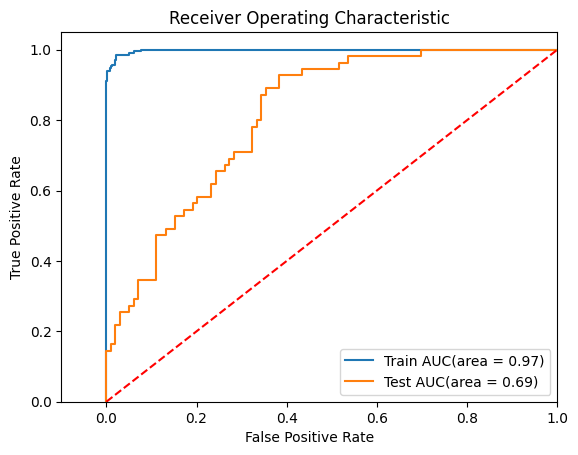

In [55]:
train_logit_roc_auc = roc_auc_score(y_train, y_tree_pred_cv_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, rmf_model_CV.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, y_tree_pred_cv_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, rmf_model_CV.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

Hiper parametreler değiştirildiğinde de test ile train arasındaki fark azalmış olsada halen overfitting gözlemlenmketedir.

### 5. Naive bayes sınıflandırıcısı

In [44]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_GNB_train = gnb.predict(X_train)
y_pred_GNB_test = gnb.predict(X_test)

In [45]:
RMSE_GNB_train = np.sqrt(mean_squared_error(y_train, y_pred_GNB_train))
RMSE_GNB_test = np.sqrt(mean_squared_error(y_test, y_pred_GNB_test))

MAE_GNB_train = mean_absolute_error(y_train, y_pred_GNB_train)
MAE_GNB_test = mean_absolute_error(y_test, y_pred_GNB_test)

R2_GNB_train = r2_score(y_train, y_pred_GNB_train)
R2_GNB_test = r2_score(y_test, y_pred_GNB_test)

ACS_GNB_train = accuracy_score(y_train, y_pred_GNB_train)
ACS_GNB_test = accuracy_score(y_test,y_pred_GNB_test)



print("RMSE (Train):", RMSE_GNB_train)
print("RMSE (Test):", RMSE_GNB_test)
print("MAE (Train):", MAE_GNB_train)
print("MAE (Test):", MAE_GNB_test)
print("R2 Score (Train):", R2_GNB_train)
print("R2 Score (Test):", R2_GNB_test)
print("Accuracy score (Train):", ACS_GNB_train)
print("Accuracy score (Test):", ACS_GNB_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_pred_GNB_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_pred_GNB_test))

print(classification_report(y_test, y_tree_pred_cv_test))

RMSE (Train): 0.5261871949880396
RMSE (Test): 0.5032362797401965
MAE (Train): 0.2768729641693811
MAE (Test): 0.2532467532467532
R2 Score (Train): -0.22206221535363446
R2 Score (Test): -0.10303030303030303
Accuracy score (Train): 0.7231270358306189
Accuracy score (Test): 0.7467532467532467
Confusion Matrix (Training Set):
 [[329  72]
 [ 98 115]]

Confusion Matrix (Testing Set):
 [[86 13]
 [26 29]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        99
         1.0       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



Eğitim verilerindeki R2 skoru negatiftir (-0,0665) bu da eğitim verilerinden faydalı bir şey öğrenemediğini göstermektedir. Test verileri için R2 skoru çok düşüktür (0,027), bu da hedef değişkenin varyansının neredeyse hiçbirini açıklamadığını gösterir. Genel olarak, düşük RMSE ve MAE değerleri elde edilmiştir fakat R2 sonucun çok düşük olması modelin iyi bir sonuç vermediğini göstermeketdir. f1 score incelendiğinde %77'lik bir tahmin başarısının yanı sıra Accuracy score a göre test(0.77), train(0.75)'e göre daha iyi bir tahmin değeri sunmaktadır. Bu da modelimizin yeni verilere daha iyi tahminde bulunduğunu göstermektedir. 

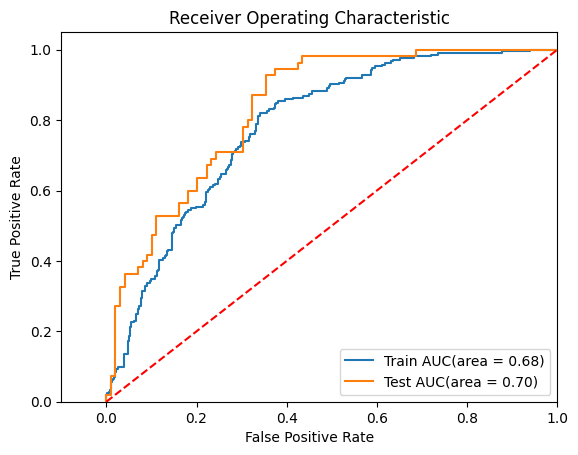

In [46]:
train_logit_roc_auc = roc_auc_score(y_train, y_pred_GNB_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, y_pred_GNB_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

Train AUC  0,72'lik ve Test için 0.75'lik bir sonuç vermektedir. Bu da iyi bir ayrım yapma becerisine işaret etmektedir. Model, eğitim verilerinden bazı genel kalıplar öğrenmiştir ancak mükemmel değildir.

Mükemmel bir sınıflandırıcı seviyesinde değildir ancak rastgele tahminden iyi bir performans gösterir.

#### Cross-Validation uygulayalım.

In [14]:
gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(-10, -1, num=10000)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5).fit(X, y)

In [15]:
print("En iyi Parametereler:", grid_search.best_params_)
print("En iyi Score:", grid_search.best_score_)

En iyi Parametereler: {'var_smoothing': 0.048918028631089114}
En iyi Score: 0.7734912146676851


In [49]:
gnb_CV = GaussianNB(var_smoothing=0.048).fit(X_train, y_train)

In [50]:
y_pred_GNBCV_train = gnb_CV.predict(X_train)
y_pred_GNBCV_test = gnb_CV.predict(X_test)

RMSE_GNBCV_train = np.sqrt(mean_squared_error(y_train, y_pred_GNBCV_train))
RMSE_GNBCV_test = np.sqrt(mean_squared_error(y_test, y_pred_GNBCV_test))

MAE_GNBCV_train = mean_absolute_error(y_train, y_pred_GNBCV_train)
MAE_GNBCV_test = mean_absolute_error(y_test, y_pred_GNBCV_test)

R2_GNBCV_train = r2_score(y_train, y_pred_GNBCV_train)
R2_GNBCV_test = r2_score(y_test, y_pred_GNBCV_test)

ACS_GNBCV_train = accuracy_score(y_train, y_pred_GNBCV_train)
ACS_GNBCV_test = accuracy_score(y_test,y_pred_GNBCV_test) 


print("RMSE (Train):", RMSE_GNBCV_train)
print("RMSE (Test):", RMSE_GNBCV_test)
print("MAE (Train):", MAE_GNBCV_train)
print("MAE (Test):", MAE_GNBCV_test)
print("R2 Score (Train):", ACS_GNBCV_train)
print("R2 Score (Test):", ACS_GNBCV_test)
print("Accuracy score (Train):", ACS_GNBCV_train)
print("Accuracy score (Test):", ACS_GNBCV_test)
print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_pred_GNBCV_train))
print("\nConfusion Matrix (Testing Set):\n", confusion_matrix(y_test, y_pred_GNBCV_test))

print(classification_report(y_test, y_tree_pred_cv_test))


RMSE (Train): 0.5246373029763202
RMSE (Test): 0.4901629731627434
MAE (Train): 0.2752442996742671
MAE (Test): 0.24025974025974026
R2 Score (Train): 0.7247557003257329
R2 Score (Test): 0.7597402597402597
Accuracy score (Train): 0.7247557003257329
Accuracy score (Test): 0.7597402597402597
Confusion Matrix (Training Set):
 [[335  66]
 [103 110]]

Confusion Matrix (Testing Set):
 [[88 11]
 [26 29]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78        99
         1.0       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



Eğitim setindeki RMSE yaklaşık 0.524 ve test setinde 0.491'dir. Bu, modelin test setinde daha iyi performans gösterdiğini gösterir. 
MAE yaklaşık 0.275 ve test setinde 0.240'dır, bu da test setindeki hataların eğitim setine göre daha düşük olduğunu gösterir.

Eğitim seti için R2 skoru yaklaşık 0.725 ve test seti için 0.760'tır. Bu, modelin hem eğitim hem de test setinde tutarlı olduğunu gösterir. Eğitim seti için Accuracy yaklaşık 0.725 ve test seti için 0.760'tır. Model test setinde biraz daha iyi performans gösteriyor. F1 skoru, modelin bu sınıfı tespit etmede bazı zorluklar yaşadığını gösteriyor.

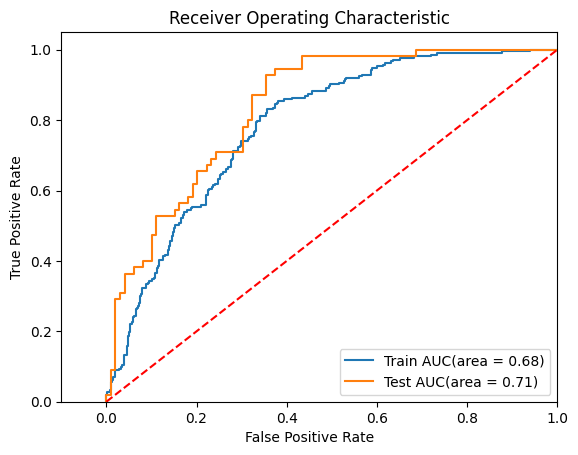

In [51]:
train_logit_roc_auc = roc_auc_score(y_train, y_pred_GNBCV_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, gnb_CV.predict_proba(X_train)[:,1])


test_logit_roc_auc = roc_auc_score(y_test, y_pred_GNBCV_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, gnb_CV.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(train_fpr, train_tpr, label = "Train AUC(area = %0.2f)" % train_logit_roc_auc)
plt.plot(test_fpr, test_tpr, label = "Test AUC(area = %0.2f)" % test_logit_roc_auc)
plt.plot([0,1], [0,1], "r--" )
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

Hiper parametreler ayarlandıktan sonrasında modelimizde %1 artış gözlemlenmiştir. Test değerinin Trainden daha iyi bir tahmin edici olması modelimiz için iyidir. Fakat değerler %90'nın altında olduğundan mükemmel bir model yerine iyi tahmin yapabilen bir model elde etmiş olduk.

### Sonuç

Doğrusal Regresyon, test setinde yaklaşık 0,31 R2 skoru ve hem eğitim hem de test setleri için benzer RMSE değerleri ile orta düzeyde etkinlik göstermiştir, bu da bu tür veriler için kararlı ancak yüksek düzeyde tahmin edici olmayan bir modele işaret etmektedir.

Multinomial Lojistik Regresyon, test setinde yaklaşık %75'lik bir doğrulukla daha iyi bir sınıflandırma performansı sunmuştur. Bununla birlikte, negatif R2 puanları, modelin altta yatan veri yapısını etkili bir şekilde yakalayamayabileceğini, potansiyel aşırı uyumu veya verilerin karmaşıklığı için uygun olmadığını göstermektedir.

RandomForestClassifier, eğitim verilerinde yüksek doğruluk (%100) göstermiş, ancak test performansında (yaklaşık %72) gözle görülür bir düşüş ve test setinde negatif R2 puanı göstermiştir. Bu, uygun ayarlama ve çapraz doğrulama olmadan rastgele orman modellerinde yaygın olan aşırı uyum olasılığının güçlü olduğunu göstermektedir.

Gaussian Naive Bayes, çapraz doğrulama uygulandıktan sonra daha yüksek bir doğruluk puanı (test setinde yaklaşık %76) elde etmiş ve RMSE ve MAE puanlarını iyileştirmiştir. Bu, Gaussian Naive Bayes'in özellikle çapraz doğrulama ile bu veri kümesi için diğerlerine kıyasla daha sağlam bir model sağladığını göstermektedir.

Sonuç olarak, her modelin güçlü yönleri olsa da, Gaussian Naive Bayes modeli, özellikle çapraz doğrulama ile birleştirildiğinde, bu özel veri kümesi için daha tutarlı ve güvenilir bir seçenek olarak ortaya çıkmıştır. 